In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, dstn, idstn, fftshift, ifftshift

from classicalfield_orig import FiniteTempGPE as gpe 

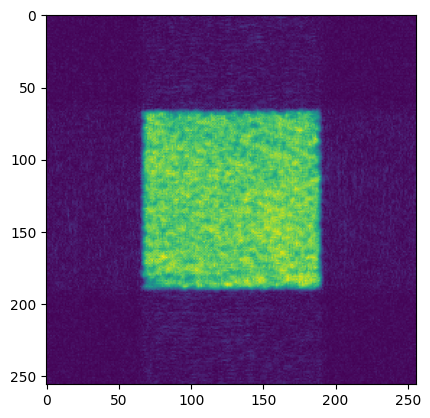

In [23]:
imported_data = np.loadtxt('testorigfile2.csv', dtype = np.complex_)
plt.imshow(np.abs(imported_data))

In [7]:
print(100/(0.0007/5))

714285.7142857143


In [11]:
print(1000/g.gpeobj.dt)

2621440.0


In [3]:
print(100/g.gpeobj.dt) 

262144.0


No vortices to be spawned
Total Imag Time:  2.479773998260498
kmax:  8.042477193189871
T:  16.170359850744806


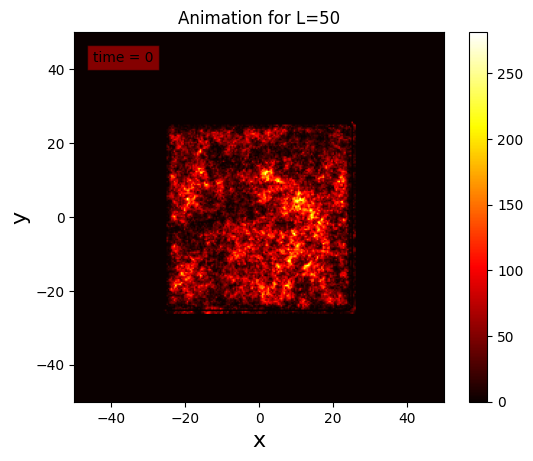

In [4]:
g = gpe(npoints = 2**7, numRealSteps = 263000, Nsamples = 1, runAnim = True, animFileName = 'newpotentialbox.mp4', Tfact = 1/2, dst = False, dtcoef = 0.0025)

In [4]:
## Figure out what dt is relative to T, kmax, and V 

In [8]:
print("Temperature: ", g.T)
# KE ~ 32 
print("dt: ", g.gpeobj.dt)
print("PE: ", np.max(g.gpeobj.Vbox))
# Eventually increase V once you can reproduce earlier results in the other file 
print("KE: ", (np.pi/g.dx)**2/2)
print("Interaction Energy: " , g.gpeobj.g * 50)
print("Total Time: ", g.gpeobj.dt * 264000)
print("Number of Atoms", g.gpeobj.Natoms)

Temperature:  16.170359850744806
dt:  0.0003814697265625
PE:  32.34071970148961
KE:  32.34071970148961
Interaction Energy:  0.9765625
Total Time:  100.7080078125
Number of Atoms 128000


In [13]:
print(g.gpeobj.dt * 50000)

38.14697265625


In [22]:
saved_file = np.savetxt('testorigfile2.csv', g.snaps[-1])

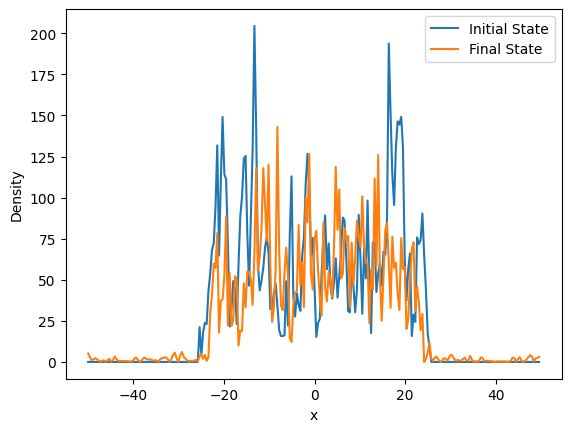

In [9]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0])[len(g.snaps[0])//2]**2, label = 'Initial State')
plt.plot(g.xi[0][0], np.abs(g.snaps[-1])[len(g.snaps[-1])//2]**2, label = 'Final State')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

In [41]:
print(np.sum(np.abs(g.snaps[0])**2)*g.dx**2)
print(np.sum(np.abs(g.snaps[-1])**2)*g.dx**2)

128000.0
128000.0


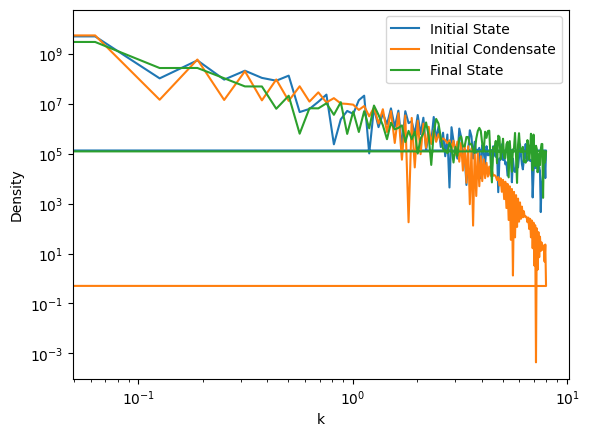

In [10]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0]))[0]**2, label = 'Initial State')
plt.plot(g.ki[0][0], np.abs(fft2(g.gs))[0]**2, label = 'Initial Condensate')
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1]))[0]**2, label = 'Final State')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('Density')
plt.legend() 


In [6]:
print(g.gpeobj.dt)
print(g.gpeobj.kmax**2/2)
print(g.T)
print(np.max(g.gpeobj.Vbox))
print(g.gpeobj.g*100) 

0.00762939453125
32.34071970148961
32.34071970148961
10.0
1.953125


In [12]:
g_2 = gpe(npoints = 2**7, numRealSteps = 264000, vortex = True, Nsamples = 1, runAnim = True, animFileName = 'fewerpoint_longsim_higherpot_smallerdt_vortex.mp4', Tfact = 1/2, dst = False, dtcoef = 0.0025)

Total Imag Time:  60.976295948028564
kmax:  32.169908772759484
T:  258.7257576119169


ValueError: operands could not be broadcast together with shapes (1024,1024) (256,256) 

In [44]:
print("Temperature: ", g_2.T)
# KE ~ 32 
print("dt: ", g_2.gpeobj.dt)
print("PE: ", np.max(g_2.gpeobj.Vbox))
# Eventually increase V once you can reproduce earlier results in the other file 
print("KE: ", (np.pi/g_2.dx)**2/2)
print("Interaction Energy: " , g_2.gpeobj.g * 50)
print("Total Time: ", g_2.gpeobj.dt * 132000)
print("Number of Atoms", g_2.gpeobj.Natoms)

Temperature:  16.170359850744806
dt:  0.000762939453125
PE:  10.0
KE:  32.34071970148961
Interaction Energy:  0.9765625
Total Time:  100.7080078125
Number of Atoms 128000


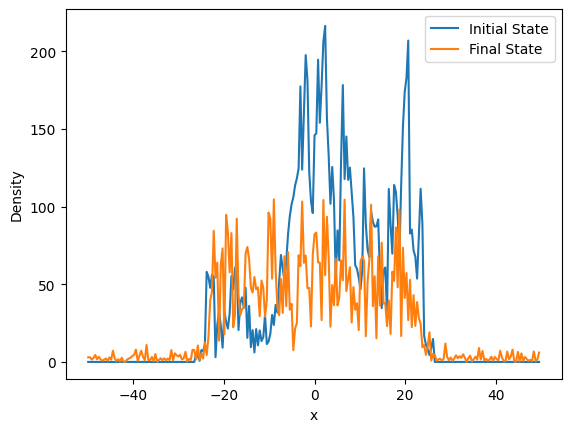

In [45]:
plt.figure() 
plt.plot(g_2.xi[0][0], np.abs(g_2.snaps[0])[len(g_2.snaps[0])//2]**2, label = 'Initial State')
plt.plot(g_2.xi[0][0], np.abs(g_2.snaps[-1])[len(g_2.snaps[-1])//2]**2, label = 'Final State')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

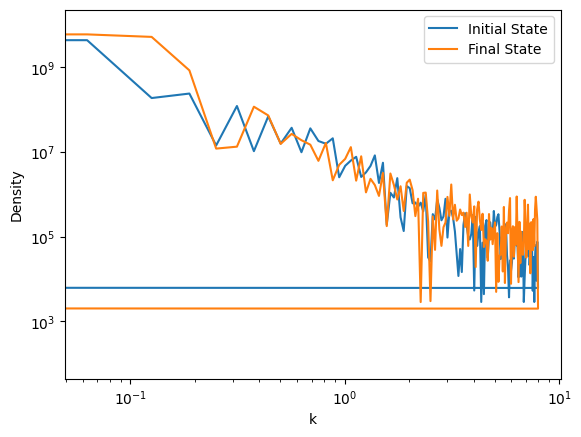

In [46]:
plt.figure() 
plt.plot(g_2.ki[0][0], np.abs(fft2(g_2.snaps[0]))[0]**2, label = 'Initial State')
plt.plot(g_2.ki[0][0], np.abs(fft2(g_2.snaps[-1]))[0]**2, label = 'Final State')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('Density')
plt.legend() 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from classicalfield_orig import FiniteTempGPE as gpe

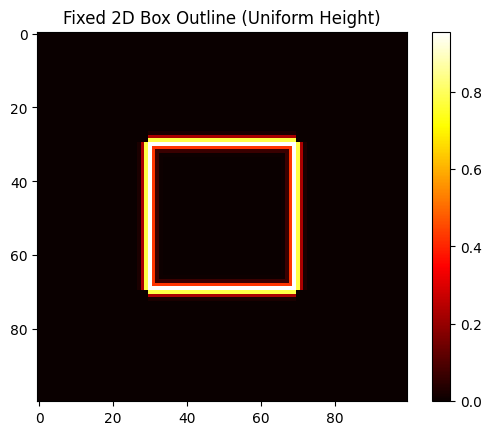

In [2]:


def box_outline_2d(shape=(100, 100), L=40, height=1, thickness=1):
    x = np.linspace(-shape[0]//2, shape[0]//2, shape[0])
    y = np.linspace(-shape[1]//2, shape[1]//2, shape[1])
    X, Y = np.meshgrid(x, y, indexing='ij')

    half_L = L / 2

    def edge_strip(coord, center, thickness):
        return np.exp(-((coord - center) ** 2) / (2 * thickness**2))

    # Create masked edge strips
    top_edge    = edge_strip(Y,  half_L, thickness) * (np.abs(X) <= half_L)
    bottom_edge = edge_strip(Y, -half_L, thickness) * (np.abs(X) <= half_L)
    left_edge   = edge_strip(X, -half_L, thickness) * (np.abs(Y) <= half_L)
    right_edge  = edge_strip(X,  half_L, thickness) * (np.abs(Y) <= half_L)


    # Combine edges using maximum to prevent corner stacking
    V = height * np.maximum.reduce([top_edge, bottom_edge, left_edge, right_edge])


    return V

# Visualize
V = box_outline_2d()
plt.imshow(V, cmap='hot')
plt.colorbar()
# plt.xlim(25,35)
# plt.ylim(25,35)
plt.title("Fixed 2D Box Outline (Uniform Height)")
plt.show()


In [6]:
g = gpe(npoints = 2**7, numRealSteps = 10000, Nsamples = 1, Tfact = 1/2, dst = False, dtcoef = 0.0025)

No vortices to be spawned
Total Imag Time:  2.447258472442627
kmax:  8.042477193189871
T:  16.170359850744806


In [25]:
print(np.shape(g.gpeobj.Vbox))
print(np.shape(V))

print(g.gpeobj.Vbox.nbytes)
print(V.nbytes)

(256, 256)
(256, 256)
524288
524288


32.34071970148961
32.08707218883434


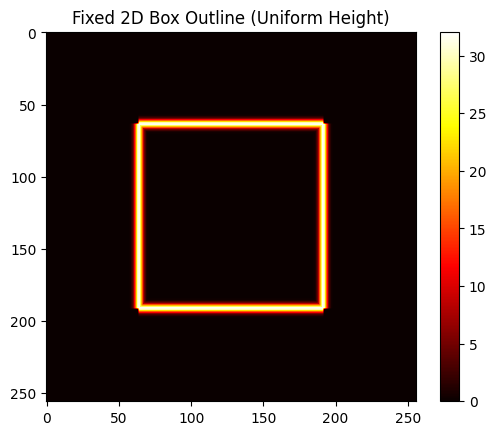

In [16]:
V = box_outline_2d(shape = np.shape(g.gpeobj.Vbox), L = 50/g.dx, height = g.gpeobj.kmax**2/2, thickness = 2)
print(g.gpeobj.kmax**2/2)
print(np.max(V))
plt.imshow(V, cmap='hot')
plt.colorbar()
# plt.xlim(25,35)
# plt.ylim(25,35)
plt.title("Fixed 2D Box Outline (Uniform Height)")
plt.show()

32.34071970148961


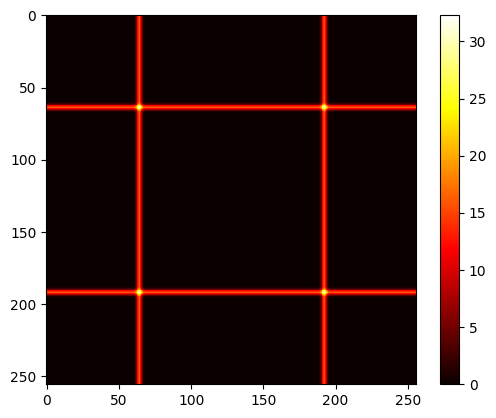

In [9]:
print(np.max(g.gpeobj.Vbox))
plt.figure() 
plt.imshow(g.gpeobj.Vbox, cmap = plt.cm.hot) 
plt.colorbar() 

In [10]:
def setbox(self):
    '''
    Set up the potential energy box to contain the wavefunction assuming a box potential  
    '''
    V = 0
    self.height = 5
    self.height = self.kmax**2/2 #self.kmax**2/4
    #self.height = self.kmax**2/2 # adjust this height coefficient as needed 
    self.steepness = 2
    #self.height =5
    for i in range(self.dim):
        V += self.height * np.array(np.power(np.e, -self.steepness*(self.xi[i] - np.ones_like(self.xi[i])*self.L/2)**2) + np.power(np.e, -self.steepness*(self.xi[i] + np.ones_like(self.xi[i])*self.L/2)**2))
        
    V[V<self.tol] = 0.0 # set values close to 0 to be 0
    # V[np.abs(self.xi[0])>=self.L//2] = self.height 
    # V[np.abs(self.xi[1])>=self.L//2] = self.height

    return V 

In [20]:
print(np.shape(V))

(256, 256)


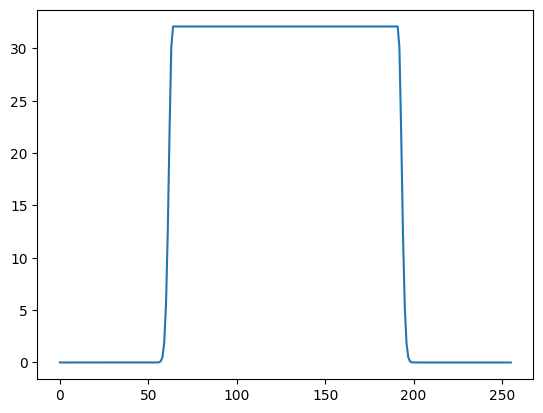

In [22]:
plt.plot( V[len(V)//4])
#plt.vlines(30, 0, 1)
#plt.vlines(69, 0, 1)